In [3]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Loading Dataset
df = pd.read_csv("Loan_default.csv")
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [6]:
# Basic Info and Missing Values check
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [7]:
# Basic Statistics
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [8]:
# Default Rate
total_loans = len(df)
total_defaults = df['Default'].sum()
default_rate = total_defaults / total_loans * 100

total_loans, total_defaults, default_rate

(255347, np.int64(29653), np.float64(11.612824901017047))

In [9]:
# Loan Purpose-Wise Default Rate
df.groupby('LoanPurpose')['Default'].mean() * 100

LoanPurpose
Auto         11.881441
Business     12.326017
Education    11.838055
Home         10.234762
Other        11.788506
Name: Default, dtype: float64

In [10]:
# Employment Type Wise Default Rate
df.groupby('EmploymentType')['Default'].mean() * 100

EmploymentType
Full-time         9.463366
Part-time        11.965213
Self-employed    11.462029
Unemployed       13.552895
Name: Default, dtype: float64

In [11]:
# Credit Score Bucktets
def credit_bucket(score):
    if score < 580: return "Poor"
    elif score < 670: return "Fair"
    elif score < 740: return "Good"
    elif score < 800: return "Very Good"
    else: return "Excellent"

df['CreditBucket'] = df['CreditScore'].apply(credit_bucket)

df.groupby('CreditBucket')['Default'].mean() * 100

CreditBucket
Excellent     9.813363
Fair         11.432122
Good         10.628878
Poor         12.474755
Very Good    10.498990
Name: Default, dtype: float64

In [12]:
# Income Buckets
def income_group(x):
    if x < 50000: return "Low"
    elif x < 100000: return "Mid"
    else: return "High"

df['IncomeBucket'] = df['Income'].apply(income_group)

df.groupby('IncomeBucket')['Default'].mean() * 100

IncomeBucket
High     9.104560
Low     17.162915
Mid     10.243655
Name: Default, dtype: float64

In [13]:
# High-Risk Customers
high_risk = df[(df['CreditScore'] < 580) & 
               (df['DTIRatio'] > 0.4) &
               (df['Default'] == 1)]

high_risk.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,CreditBucket,IncomeBucket
11,Y8UETC3LSG,28,149227,139759,375,56,3,5.84,36,0.80,PhD,Full-time,Divorced,No,No,Education,Yes,1,Poor,High
27,G8AIMX5E52,39,17633,167105,514,62,3,7.86,36,0.66,High School,Full-time,Single,Yes,Yes,Auto,Yes,1,Poor,Low
40,EGBQ6R80VB,20,139321,43049,458,117,2,7.16,36,0.53,Master's,Self-employed,Single,Yes,No,Home,No,1,Poor,High
47,RSP1YD80Z7,35,95963,77552,560,8,2,6.63,24,0.86,Master's,Self-employed,Divorced,Yes,Yes,Home,No,1,Poor,Mid
50,06Q275JKQB,31,103515,220032,369,57,2,22.36,24,0.81,PhD,Unemployed,Divorced,No,No,Education,Yes,1,Poor,High


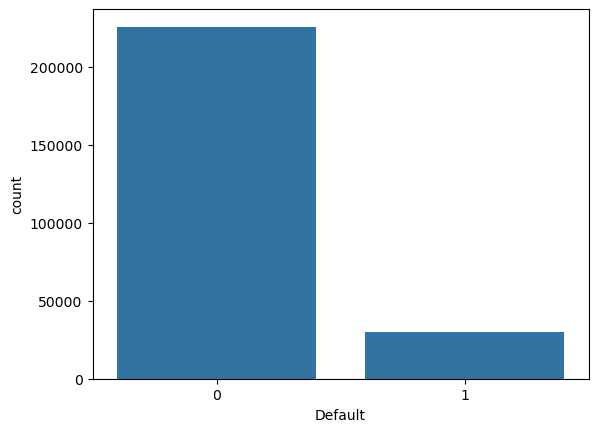

In [16]:
# Default Distribution
sns.countplot(data=df, x='Default')
plt.show()

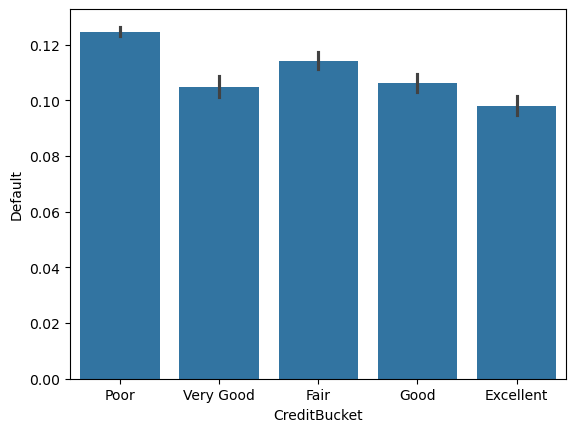

In [15]:
# Credit Score Bucket Vs Default
sns.barplot(data=df, x='CreditBucket', y='Default')
plt.show()